University of Zagreb<br/>
Faculty of Electrical Engineering and Computing<br/>
Department of Electronic Systems and Information Processing

Academic year 2020/2021

**1st laboratory exercise**

*Digital Image Processing and Analysis* (183463)

Date: 2022-03-11

Please send any feedback (corrections, comments, suggestions etc.) regarding this document to franko.sikic@fer.hr.

© University of Zagreb Faculty of Electrical Engineering and Computing, 2021.

Permission is granted to make and distribute copies of this instructions provided the copyright notice and this permission notice are preserved on all copies.

# Introduction

Instructions for laboratory exercises for the course *Digital Image Processing and Analysis* are prepared in a form of a <a href="https://jupyter.org/">Jupyter</a> notebooks.

All problems in prepared notebook are intended to be completed in Python using <a href="https://colab.research.google.com">Google Colaboratory</a> platform (Colab for short).

## How to Submit Your Laboratory Report

Simply write-in your code to all empty code cells and write in your answers to the text cells with questions.

Empty code cells contain the placeholder text `# Write-in your solution` while text cells where you have to write-in someting contain a bold uppercase text **WRITE YOUR ANSWER HERE**.

Once you have completed all problems save this notebook locally in a file named DIPA_LAB_X_NAME_SURNAME.ipynb,
where X is the exercise number, and submit it via Moodle under the appropriate upload section.

Your submissions will be first automatically re-evaluated which corresponds to selecting the *Runtime/Restart and run all* command in Colab. Therefore, it is strongly suggested that you run this command yourself before submitting your notebook. Another thing to do before submission is to clear all the cell outputs by selecting *Edit/Clear all outputs*. This will reduce the size of .ipynb files for upload.

## Student Information

Before proceeding double click on this text and then fill in your name:

Name: Enio Krizman

Student ID number (JMBAG): 0069083848

## Suggested Reading

### General Reading

If you are not familiar with Python then start with a Python tutorial such as e.g. an official one available at <a href="https://docs.python.org/3/tutorial/">https://docs.python.org/3/tutorial/</a>.

Jupyter notebooks are relying on <a href="https://ipython.org/">IPython</a>, which is an interactive Python interpreter. Jupyter notebooks may be run locally or they may be conveniently executed remotely in Google Colaboratory via web browser.

Readers familiar with Matlab who have only basic knowledge of Python are strongly encouraged to read the document <a href="https://numpy.org/doc/stable/user/numpy-for-matlab-users.html">NumPy for Matlab users</a> before attempting to solve this laboratory exercise in Colab.

### Image Processing in Python

Some general image processing functions are available as a part of [`scipy.ndimage`](https://docs.scipy.org/doc/scipy/reference/ndimage.html). This basic functionality is extended by the [`scikit-image`](https://scikit-image.org/). We will also use [OpenCV](https://opencv.org/).

## Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Importing Required Functions

To simplify the code in Python in this notebook we may deliberately import functions from <a href="https://www.scipy.org/">SciPy</a>, <a href="https://numpy.org/">NumPy</a> and <a href="https://matplotlib.org/">Matplotlib</a> directly into the global namespace so e.g. we can write `fft` instead of `scipy.fft.fft`.

Please keep in mind that such an approach may be tolerated for the purpose of a short laboratory exercise where risks of collisions and side effects are minimal. It is best always avoided in production code.

If you prefer to use namespaces then feel free to change the import statements to retain strict package separation, e.g. `import numpy as np`.

In [ ]:
# Import packages
import cv2
import skimage.io

# To display images in browser
from google.colab.patches import cv2_imshow

# Import some functions to the global namespace for convenience
from scipy.ndimage import *
from scipy.fft import *
from scipy.signal import * 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import *
from skimage import img_as_float

## Image loading

We will be using images from the [USC-SIPI database](http://sipi.usc.edu/database/) and additional images available on the [DIPA class webpage](https://www.fer.unizg.hr/en/course/dipaa_b/laboratory#%23!p_rep_139398!_-187329). To load any of these images, all we have to do is copy the URL of the image (the download link) and write the following two lines of code.

In [ ]:
url = "http://sipi.usc.edu/database/download.php?vol=misc&img=5.3.02"
img = skimage.io.imread(url, plugin = 'pil')

# 1.0 Image representations

[Grayscale](https://en.wikipedia.org/wiki/Grayscale) images are composed exclusively of shades of gray. In a computer a 2D gray image is represented as an $M \times N$ matrix of pixel values, which merely represent light intensity. 

It takes several such matrices for colored images - one for each channel. There are several color models used for colored image representation. For instance, an [RGB](https://en.wikipedia.org/wiki/RGB_color_model) image has 3 channels (for red, green and blue color) so an $M \times N \times 3$ matrix is used.   Colored images can be converted to grayscale images, usually by performing a weighted sum of the channels. The [cv2.cvtColor()](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab) function is used to convert images from one color space to another.

These representations allow the use of common matrix operators for image processing and analysis. 

Note that images can be stored either in [row-major order or column-major order](https://en.wikipedia.org/wiki/Row-_and_column-major_order). Also note that some tools use BGR order of color channels instead of RGB (for more information see [endianness](https://en.wikipedia.org/wiki/Endianness)).

Numpy uses row-major and OpenCV uses BGR row-major order.


In [ ]:
url = "http://sipi.usc.edu/database/download.php?vol=misc&img=4.2.07"
img = skimage.io.imread(url)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # openCV uses BGR (blue, green, red) representation
cv2_imshow(img)

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

In [ ]:
horizontal_section = img[150:200, :, :] #choosing only 50 rows of the matrix, which correspond to 50 horizontal lines of the image
cv2_imshow(horizontal_section)

In [ ]:
red_channel = img[:,:,2]
cv2_imshow(red_channel)

### **1.0.1 Problems**

1. Display a vertical section of the Mandrill (http://sipi.usc.edu/database/download.php?vol=misc&img=4.2.03) image from columns 300 to 450.

In [ ]:
# Write-in your solution
url_mandrill = "http://sipi.usc.edu/database/download.php?vol=misc&img=4.2.03"
image = skimage.io.imread(url_mandrill)

In [ ]:
vertical_section = image[:,300:450,:]
plt.imshow(image)
plt.show()
plt.imshow(vertical_section)
plt.show()

2. Display the blue channel of the same image. Explain why it isn't blue.

In [ ]:
# Write-in your solution
blue_channel = image[:,:,2]
cv2_imshow(blue_channel)

**RGB slika ima 3 kanala(crveni,plavi i zeleni) te oni ne prate ljudsku percepciju boja i zato nam se slika čini siva. Tek kada kombiniramo sva 3 kanala u jednoj slici možemo dobiti sliku u boji. Svaki kanal se sastoji od diskretnih piksela s konvecionalnom svjetlinom.**

# 1.1 Unary operations on the image

Unary operations on the image are mathematical operations whose input is a pixel intensity value, and the
output is a changed intensity value of the same pixel. The operation is performed for all of the pixels in
the image, meaning that a unary operator produces an image for each given input image. A scheme of a unary operation is given with Fig.1.1.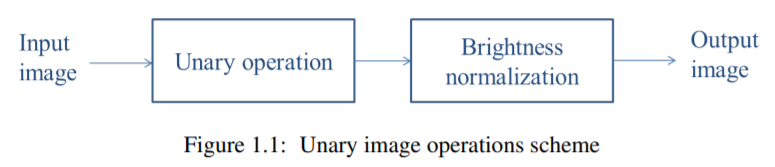

A unary operation can be any mathematical function that changes the intensity values of the pixels in an
image. Codomain of the function does not have to be equal to its domain. Therefore, if we want to obtain
a meaningful display of an image after performing an unary operation on it, the resulting image will need
to be rescaled. Images whose pixel values are floats should be scaled to the interval
[0,1], whereas the images whose pixel values are integers should be scaled to the interval
[0,255]. 

Matplotlib function [imshow()](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html) does an automatic scaling to the required interval and displays it.
On the other hand, [cv2_imshow()](https://docs.opencv.org/master/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563) doesn't do the scaling so we have to perform it on our own. For this we use [cv2.normalize()](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga87eef7ee3970f86906d69a92cbf064bd) and scale to [0, 255], regardless of the pixel value type.

## Example:

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Images/medalja_kamenita_vrata.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = np.sqrt(img, dtype='float32')
print(np.amax(img), img.shape)

# Display image
plt.imshow(img, cmap='gray')
plt.show()

img = cv2.normalize(src=img, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
cv2_imshow(img)

### **1.1.1 Problems**
1. How would you do scaling mathematically? (Write the mathematical expressions using [LaTeX](https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/))


**$$f(x)= \frac{255*(unaryoperation(img)-min(img))}{max(img)-min(img)}$$**

2. Read the image uskoci1.png. Create a grayscale image out of this image using the [cv2.cvtColor()](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab) function like this:  
`gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)` . \
Perform the following unary operations on this image: logarithmic function, square and square root,
and compare what happened to the darker, and what happened to the lighter parts of the image.

In [ ]:
# Write-in your solution
image = cv2.imread("/content/drive/MyDrive/Images/uskoci1.png")
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_img = img_as_float(gray_img)
plt.imshow(gray_img,cmap='gray')
plt.show()

In [ ]:
square_img = np.square(gray_img,dtype='float32')
plt.imshow(square_img, cmap='gray')
print(square_img)

Kvadriranjem se postiže zatamnjenje slike jer nova vrijednost svakog piksela zapravo veća za vrijednost kvadrata, u "float" reprezentaciji bliža nuli i u "int" reprezentaciji bliža 255 što zapravo govori da je piksel nakon jedinične operacije kvadriranja tamniji.

In [ ]:
sqrt_img = np.sqrt(gray_img,dtype='float32')
plt.imshow(sqrt_img, cmap='gray')
print(sqrt_img)

Korjenovanje ima suprotan efekt kvadriranju te je nova vrijednost svakog piksela zapravo manja za vrijednost njenog korjena, u "float" reprezentaciji bliža jeidnici i u "int" reprezentaciji bliža nuli što zapravo govori da je piksel nakon jedinične operacije korjenovanja svjetliji.

In [ ]:
log_img = np.log(gray_img,dtype='float32')
plt.imshow(log_img, cmap='gray')
print(log_img)

Operacijom logaritmiranja postiže se isticanje točaka/piksela manje vrijednosti u odnosu na točke s velikim vrijednostima. Točkama tamnijeg intenziteta pridjeljuje svjetlije vrijednosti čime se postiže da se određeni detalji koji prije nisu bili vidljivi učine vidljivim ljudskom oku. Međutim, vrijednosti svjetlijeg intenziteta se ne smanjuju u mjeri u kojoj se povećavaju vrijednosti tamnijeg intenziteta.

3. If we denote these unary operations with $U_x, x = 1,2,3$, and scaling of the brightness with $N$, write
an expression for the transfer function of the system given with the Fig.1.1. (Transfer function is a
composition of the functions: $H_x = N ◦U_x $.)


$$H_1=N*U_1=N(x^2),
H_2=N*U_2=N(sqrt{x}),  
H_3=N*U_3=N(log(x))$$

4. Display the shape of the transfer function for each of the given unary operations.

In [ ]:
# Write-in your solution
x= np.linspace(0.1, 1000, num = 10000)

#subplot(nrows, ncols, index, **kwargs)
plt.figure(figsize=(10,10))
log = plt.subplot(3,1,1)
log.plot(x,np.log(x))
log.set_title("Logartitamska funkcija")
log.grid()

In [ ]:
plt.figure(figsize=(10,10))
sqr = plt.subplot(3,1,2)
sqr.plot(x,np.square(x))
sqr.set_title("Funkcija kvadrata")
sqr.grid()

In [ ]:
plt.figure(figsize=(10,10))
sqrt = plt.subplot(3,1,3)
sqrt.plot(x,np.sqrt(x))
sqrt.set_title("Funkcija korjena")
sqrt.grid()

# 1.2 Binary operations

Binary operations are the operations that take two input images to perform a mathematical operation. The
scheme of the binary operation is given in Fig. 1.2.
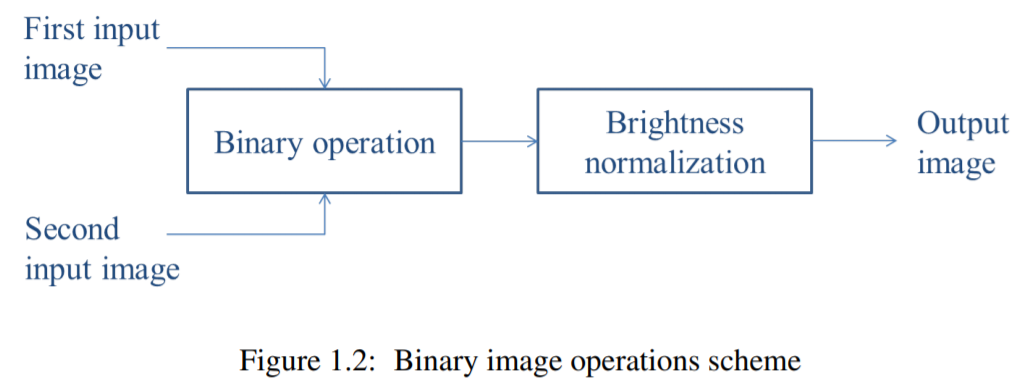



Binary options require the input images sizes to be equal. The options for this are following: To decrease
the size of the bigger image, to increase the size of the smaller image, or to change the size of both
images. Also, the colorspace of both images needs to be the same (RGB, [HSV](https://en.wikipedia.org/wiki/HSL_and_HSV) or other; or black and
white - grayscale, ie. both images need to be indexed and have the same color palette.

## Example:

In [ ]:
img1 = cv2.imread("/content/drive/MyDrive/Images/medalja_kamenita_vrata.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("/content/drive/MyDrive/Images/medalja_dubrovnik.png")

print(img1.shape, img2.shape)
img2 = cv2.resize(img2, img1.shape[:2], interpolation=cv2.INTER_LINEAR) #bilinear interpolation
print(img1.shape, img2.shape)

img = img1 + img2
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')

### **1.2.1 Problems**
1. Pick two grayscale images with different sizes from the USC-SIPI image database. Try several binary
operations on them: summation, multiplication, and subtraction. Display the results and explain them.

In [ ]:
# Write-in your solution
url1 = "https://sipi.usc.edu/database/download.php?vol=sequences&img=6.1.11"
img1 = skimage.io.imread(url1)
img1 = img_as_float(img1)
plt.imshow(img1, cmap='gray')
plt.show()

url2 = "https://sipi.usc.edu/database/download.php?vol=sequences&img=motion03.512"
img2 = skimage.io.imread(url2)
img2 = img_as_float(img2)
plt.imshow(img2, cmap='gray')
plt.show()

print(img1.shape, img2.shape)
img2 = cv2.resize(img2, img1.shape[:2], interpolation=cv2.INTER_LINEAR) #bilinear interpolation
print(img1.shape, img2.shape)

img_sum = img1+img2
img_sub = img1-img2
img_mul = img1*img2

plt.figure(figsize=(8,8))
plt.imshow(img_sum, cmap='gray')
plt.figure(figsize=(8,8))
plt.imshow(img_sub, cmap='gray')
plt.show()
plt.figure(figsize=(8,8))
plt.imshow(img_mul, cmap='gray')

Grayscale je prezentacija slike gdje pikseli imaju u "float" obliku vrijednosti od 0(crno, izostatank svjetline) do 1(bijelo, potpuna svjetlina). Normalizacijom slike postiže se da su sve vrijednosti slike u granicama između 0 i 1, a kako skaliranje ovisi o maksimalnoj i minimalnoj vrijednosti tako i raspodjela nijansi na slikama upravo ovisi o rasponu vrijednosti te su zato kod množenja i zbrajanja više očuvane originalne nijanse nego li je to slučaj kod oduzimanja.

2. Try the same binary operations using color (RGB) images. Display the results. Explain what happened.

In [ ]:
# Write-in your solution
url1 = "https://sipi.usc.edu/database/download.php?vol=misc&img=4.1.04"
img1 = skimage.io.imread(url1)
img1= img_as_float(img1)
plt.imshow(img1)
plt.show()

url2 = "https://sipi.usc.edu/database/download.php?vol=misc&img=4.1.05"
img2 = skimage.io.imread(url2)
img2 = img_as_float(img2)
plt.imshow(img2)
plt.show()

print(img1.shape, img2.shape)
img2 = cv2.resize(img2, img1.shape[:2], interpolation=cv2.INTER_LINEAR) #bilinear interpolation
print(img1.shape, img2.shape)


img_sum = img1+img2
img_mul = img1*img2
img_sub = img1-img2

plt.imshow(img_sum)
plt.show()


plt.imshow(img_sub)
plt.show()

plt.imshow(img_mul)
plt.show()


"float" vrijednosti u RGB prikazu poprimaju vrijednosti od 0 do 1 u tri zasebna kanala te se za svaki kanal normalizacija vrši zasbeno. Zbog takvog pristupa kod zbrajanja se dogodilo da su sve vrijednosti piksela kombiniranih kanala postale veće te su neke premašile "float" granicu od 1 te su zato određeni dijelovi slike u potpunosti bijeli jer je maksimalna vrijednost piksela u "float" reprezentaciji 1. Kod oduzimanja događa se suprotno, sve vrijednosti piksela kombiniranih kanala manje od 1 postaju crne. Kod množenja vrijednosti piksela ne prelaze zadane granice te jasno može razaznati od koje dvije zasebne slike se novonastala slika sastoji. Zaključno, ukoliko piksel u kanalima imaju male ili velike vrijednosti svjetline RGB kanala(bliže 0 ili 255) kod operacija zbrajanja i oduzimanja postoji mogučnost da će se dio infromacije izgubiti tj. da će vrijednosti piksela doseći gornju ili donju granicu(postati će u potpunosti crni ili bijeli). Nadalje, kod boja nastalih podjednakim manje izraženim kombiniranjem RGB kanala informacija o originalnoj boji neće se moći u potpunosti razaznati(npr. kuća u pozadini u potpunosti promijenila boju), dok će pikseli s izraženijim vrijednostima jednih od 3 kanala sačuvati više informacija o originalnoj boji (vidljivo na košulji u kojoj dominira R komponentna RGB-a).

###  **1.2.2 Digital angiography**
The most common binary operation in the practice is the subtraction of the images. It is often used to detect or enhance a difference between two images. One such example is [digital subtraction angiography (DSA)](https://en.wikipedia.org/wiki/Digital_subtraction_angiography), which is a frequently used medical imaging technique. In this type of applications, one of the images usually contains a scene (the background), while the other image contains the same scene including objects (e.g. blood vessels), which we want to enhance, positioned in front of the same background. Assuming that the background is the same in both images, subtraction of the images results in a new image with the objects of interest being enhanced.


###  **1.2.3 Problems**
1. Read the images angio0.tiff and angio1.tiff. These images contain a head scan before and after the
contrast injection. Subtract these two images and display the result. What did you obtain in the
resulting image?


In [ ]:
# Write-in your solution
img1 = cv2.imread("/content/drive/MyDrive/Images/angio0.tif")
img1 = img_as_float(img1)
img2 = cv2.imread("/content/drive/MyDrive/Images/angio1.tif")
img2 = img_as_float(img2)
plt.imshow(img1, cmap='gray')
plt.show()
plt.imshow(img2, cmap='gray')
plt.show()

img = img1 - img2

plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')

**U rezultatnoj slici vide se samo krvne žile jer oduzimanjem istih piksela s različitih slika dobivamo zapravo na novoj slici samo ono što je različito na njima. Razlog tomu je kada odumemo 2 piksela s različitih slika koji imaju iste vrijednosti dobivamo 0 što predstavlja crnu boju i zato ona prevladava. Na slici vidljivi jedino pikseli čijim oduzimanjem se dobiva vrijednost veča od 0.**


## **1.2.4 Linear convolution**
Linear convolution is a mathematical operation used to compute the output of a linear spatially invariant (LSI) system for a given input. The LSI system is characterised by its impulse response function, which is often called a mask. Two-dimensional (2-D) LSI systems used in practical image processing applications usually have impulse response functions, which have relatively small regions of support such as 3x3, 5x5, or 7x7. LSI systems having an impulse response function with a finite region of support are also called FIR (finite impulse response) systems. The practical reason for using impulse response functions with such small regions of support is to limit the number of operations needed to calculate the linear convolution. However, even by using such simple FIR filters it is possible to perform a range of useful image processing operations including noise smoothing and edge detection. Two examples of the convolution operation are given further in the text.

Convolution of an image and a mask is performed by calling the function [cv2.filter2D](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04). This function preserves the dimensions of the image.

## Example:

In [ ]:
img1 = cv2.imread("/content/drive/MyDrive/Images/medalja_kamenita_vrata.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) 
mask = np.array(
       [[1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]]) / 4
mask = cv2.flip(mask, flipCode=-1)  #flipCode < 0 --> both horizontal and vertical flipping
print(mask)

img = cv2.filter2D(img1, ddepth=-1, kernel=mask)

plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')

## Example:

The [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) function allows calculating convolution with several output size options. 

In [ ]:
img2 = cv2.imread("/content/drive/MyDrive/Images/medalja_dubrovnik.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
mask = np.array(
       [[1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]]) / 3

img3 = convolve2d(img2, mask)  # calculate the ’full’ convolution 
img4 = convolve2d(img2, mask, mode='same') # calculate only the central part of the convolution so that the output image has the same dimensions as the input image
img5 = convolve2d(img2, mask, mode='valid') # calculate only the ’correct’ central part of the convolution
print(img3.shape, img4.shape, img5.shape)

plt.figure(figsize=(8,8))
plt.imshow(img3,cmap='gray')

It is noticeable that, since we don’t have information on the pixel intensity values out of the image
(surrounding the image) necessary for calculating the linear convolution, this approach introduces errors
near the borders of the image. Therefore, only the middle part of the result, with the dimensions (Mx −
Mh +1)×(Nx −Nh +1), is a fully reliable convolution result.


###  **1.2.5 Problems**
1. Select several images and calculate the linear convolution (whichever *mode*) with the following masks: \\
$\frac{1}{4} \begin{bmatrix} 1 & 0 & −1 \\ 2 & 0 & −2 \\ 1 & 0 & −1 \end{bmatrix}$ , 
$\frac{1}{3} \begin{bmatrix} 1 & 1 & 1 \\ 0 & 0 & 0 \\ -1 & -1 & −1 \end{bmatrix}$ , 
$\begin{bmatrix} -1 & -1 & -1 \\ -1 & 8 & -1 \\ -1 & -1 & −1 \end{bmatrix}$ ,
$\begin{bmatrix} 0 & -1 & 0 \\ -1 & 4 & −1 \\  0 & -1 & 0 \end{bmatrix}$

Display the results and comment them.


In [ ]:
# Write-in your solution
img1 = cv2.imread("/content/drive/MyDrive/Images/klis2.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

mask1 = np.array(
       [[1/4, 0, -1/4],
        [1/2, 0, -1/2],
        [1/4, 0, -1/4]]) 

mask2 = np.array(
       [[1, 1, 1],
        [0, 0, 0],
        [-1, -1, -1]]) / 3

mask3 = np.array(
       [[-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1]])

mask4 = np.array(
       [[0, -1, 0],
        [-1, 4, -1],
        [0, -1, 0]])

print(mask1)
print(mask2)
print(mask3)
print(mask4)

conv11 = convolve2d(img1, mask1)  # calculate the ’full’ convolution 
conv12 = convolve2d(img1, mask2)  # calculate the ’full’ convolution 
conv13 = convolve2d(img1, mask3)  # calculate the ’full’ convolution 
conv14 = convolve2d(img1, mask4)  # calculate the ’full’ convolution



plt.imshow(conv11,cmap='gray')
plt.show()
plt.imshow(conv12,cmap='gray')
plt.show()
plt.imshow(conv13,cmap='gray')
plt.show()
plt.imshow(conv14,cmap='gray')
plt.show()

In [ ]:
img2 = cv2.imread("/content/drive/MyDrive/Images/blood1.tif")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3 = cv2.imread("/content/drive/MyDrive/Images/moon.tif")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
mask1 = np.array(
       [[1/4, 0, -1/4],
        [1/2, 0, -1/2],
        [1/4, 0, -1/4]]) 

mask2 = np.array(
       [[1, 1, 1],
        [0, 0, 0],
        [-1, -1, -1]]) / 3

mask3 = np.array(
       [[-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1]])

mask4 = np.array(
       [[0, -1, 0],
        [-1, 4, -1],
        [0, -1, 0]])


conv11 = convolve2d(img2, mask1)  # calculate the ’full’ convolution 
conv12 = convolve2d(img2, mask2)  # calculate the ’full’ convolution 
conv13 = convolve2d(img2, mask3)  # calculate the ’full’ convolution 
conv14 = convolve2d(img2, mask4)  # calculate the ’full’ convolution
conv21 = convolve2d(img3, mask1)  # calculate the ’full’ convolution
conv22 = convolve2d(img3, mask2)  # calculate the ’full’ convolution
conv23 = convolve2d(img3, mask3)  # calculate the ’full’ convolution
conv24 = convolve2d(img3, mask4)  # calculate the ’full’ convolution

plt.imshow(conv11,cmap='gray')
plt.show()
plt.imshow(conv12,cmap='gray')
plt.show()
plt.imshow(conv13,cmap='gray')
plt.show()
plt.imshow(conv14,cmap='gray')
plt.show()


plt.imshow(conv21,cmap='gray')
plt.show()
plt.imshow(conv22,cmap='gray')
plt.show()
plt.imshow(conv23,cmap='gray')
plt.show()
plt.imshow(conv24,cmap='gray')
plt.show()

Prva maska je Sobelova maska koja istovremeno služi za pronalaženje vertikalni rubova i uglađivanje(otklanja šumove), dok je druga maska Prewittova maska za pronalaženje rubova u horizontalnom smjeru, ali za razliku od Sobelovog operatora ne daje naglasak na piksele koji su bliže središtu maske. Ove dvije maske koriste se za računanje prve derivacije slike. Preostale dvije maske su tzv. Laplaceovi operatori za detekciju rubova koji služe za izračun druge derivacije slike u 1 prolazu i vrlo su osjetljivi na šum te se zato često prvo mora provesti Gaussovo zaglađivanje slike prije nego li se upotrijebi maska.


2. Define the mask (with the dimensions 4 × 4) for averaging the images and apply it to one of the
selected images from Problem 1. using the linear convolution.
Which mask did you choose?


In [ ]:
# Write-in your solution
img1 = cv2.imread("/content/drive/MyDrive/Images/klis2.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread("/content/drive/MyDrive/Images/blood1.tif")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3 = cv2.imread("/content/drive/MyDrive/Images/moon.tif")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

mask_average = np.array(
       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])/16

conv11 = convolve2d(img1, mask_average)  # calculate the ’full’ convolution 
conv12 = convolve2d(img2, mask_average)  # calculate the ’full’ convolution 
conv13 = convolve2d(img3, mask_average)  # calculate the ’full’ convolution 


plt.imshow(conv11,cmap='gray')
plt.show()
plt.imshow(conv12,cmap='gray')
plt.show()
plt.imshow(conv13,cmap='gray')
plt.show()

Usrednjavanje je metoda 'izglađivanja' slika smanjenjem količine varijacije intenziteta između susjednih piksela te radi tako što se "kreće" kroz sliku piksel po piksel, zamjenjujući svaku vrijednost prosječnom vrijednošću susjednih piksela unutar kvadratnog prozora. Veći kvadratni prozor koristi se kako bi se bolje otklonio šum, međutim kao posljedica se može dogoditi veće zamagljenje detalja i rubova.


3. Did the chosen mask require the normalization of the image brightness? Why?

Nije potrebna normalizacija svjetline jer je frekvencijski odziv filtra periodička funckija.


4. Is the convolution a unary or a binary image operation?

Konvolucija je binarna operacija jer su potrebna 2 ulaza/slike tj. slika i maska.
